In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# carregando os dados dos valores das ações dos últimos 10 anos
dados = pd.read_csv('Ibovespa.csv', sep=",")

In [3]:
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28.12.2023,134.185,134.194,134.389,133.832,"7,81M","-0,01%"
1,27.12.2023,134.194,133.523,134.195,133.328,"6,17M","0,49%"
2,26.12.2023,133.533,132.753,133.645,132.753,"5,15M","0,59%"
3,22.12.2023,132.753,132.182,133.035,132.094,"8,23M","0,43%"
4,21.12.2023,132.182,130.826,132.277,130.822,"8,68M","1,05%"


In [4]:
# alterando o nome da coluna 'Último' para 'Fechamento'


dados.rename(columns={"Último":"Fechamento"}, inplace=True)

In [5]:
# verificando se existem dados nulos
dados.isnull().sum()

Data          0
Fechamento    0
Abertura      0
Máxima        0
Mínima        0
Vol.          1
Var%          0
dtype: int64

In [6]:
# Visualizando informações sobre os campos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        2476 non-null   object 
 1   Fechamento  2476 non-null   float64
 2   Abertura    2476 non-null   float64
 3   Máxima      2476 non-null   float64
 4   Mínima      2476 non-null   float64
 5   Vol.        2475 non-null   object 
 6   Var%        2476 non-null   object 
dtypes: float64(4), object(3)
memory usage: 135.5+ KB


In [7]:
# Observamos acima que o campo Data está no formato de string.
# Temos que converter esse campo em tipo date para podermos analisar os dados corretamente
dados.Data = pd.to_datetime(dados.Data)

In [8]:
# visualizando conjunto de estatísticas descritivas
dados.describe()

,Fechamento,Abertura,Máxima,Mínima
count,2476.000000,2476.000000,2476.000000,2476.000000
mean,84.596605,84.564613,85.378550,83.777387
std,26.455365,26.445219,26.614901,26.271315
min,37.497000,37.501000,38.031000,37.046000
25%,57.624000,57.602500,58.088500,57.081500
50%,85.790000,85.768000,86.631000,85.052000
75%,108.809000,108.791000,109.884750,107.882500
max,134.194000,134.194000,134.389000,133.832000


<AxesSubplot:xlabel='Data', ylabel='Fechamento'>

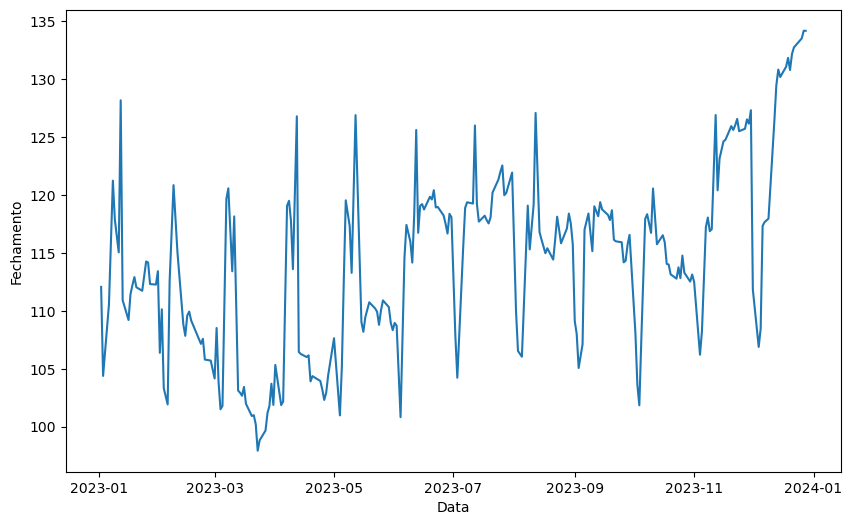

In [9]:
# Podemos fazer uma análise prévia e verificar a curva de crescimento do campo 
# Fechamento das ações no último ano. Nesse ponto podemos observar a grande variação
# dos valores das ações no fechamento dos dias.
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Data', y="Fechamento", data=dados[dados['Data'] >= '01.01.2023'])

<AxesSubplot:xlabel='Data', ylabel='taxa_crescimento_fechamento'>

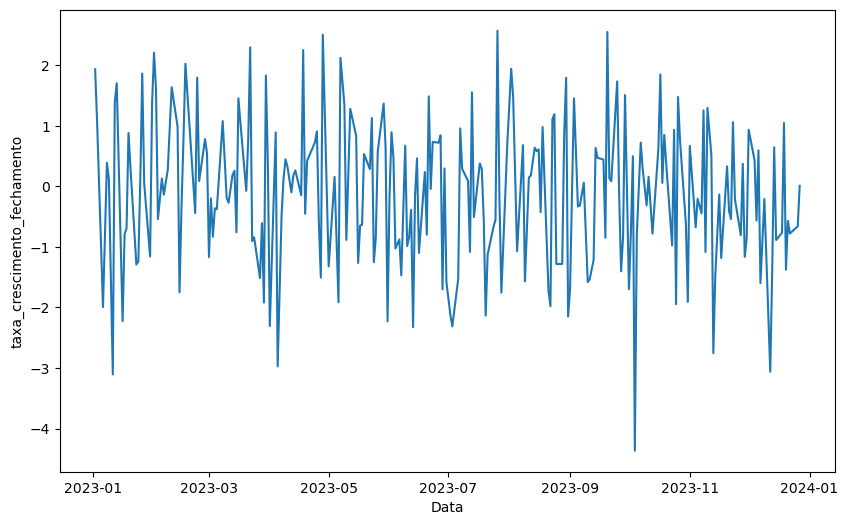

In [10]:
# Vamos observar agora a taxa de crescimento com que essas ações variam usando a 
# diferenciação.
# Podemos observar que temos uma oscilação diária muito grande nos valores das ações
plt.figure(figsize=(10,6))
dados['taxa_crescimento_fechamento'] = dados['Fechamento'].diff()
sns.lineplot(x='Data', y='taxa_crescimento_fechamento', data=dados[dados['Data'] >= '01.01.2023'])

<BarContainer object of 248 artists>

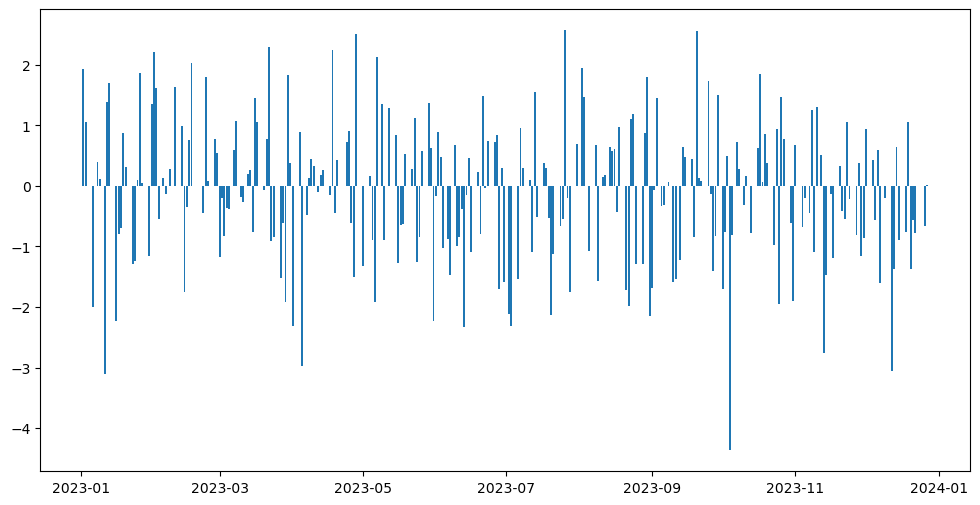

In [11]:
# podemos analisar de forma de grafico de barras. 
# Vamos criar um novo dataframe com os dados já filtrados
plt.figure(figsize=(12,6))
dados_2023 = dados[dados['Data'] >= '01.01.2023']
plt.bar(dados_2023['Data'], dados_2023['taxa_crescimento_fechamento'])

In [12]:
# Podemos melhorar o grafico realizando uma media movel dos dados
# Media movel considera uma janela de tempo, e serve para suavizar o efeito dos picos
dados_2023['media_movel_fechamento'] = dados_2023['Fechamento'].rolling(window=7, center=False).mean()


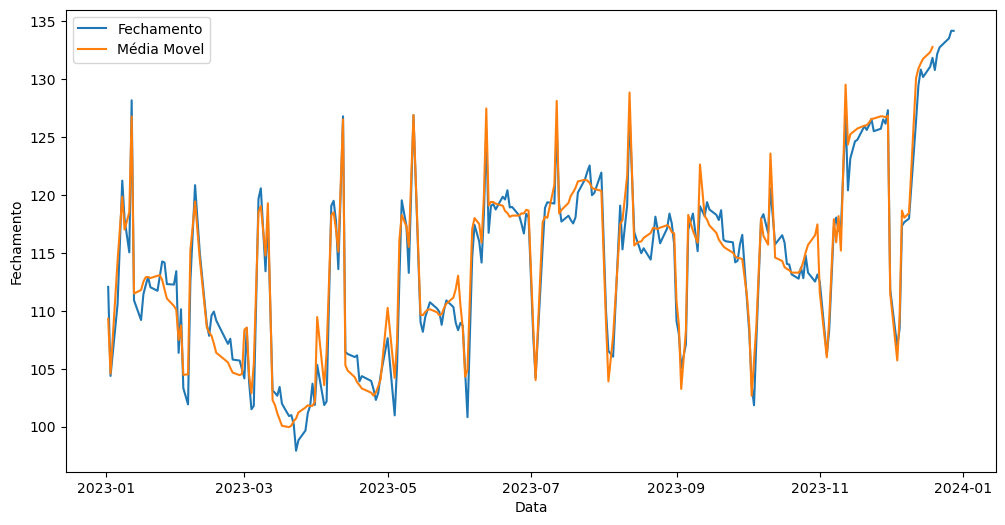

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Data', y='Fechamento', data=dados_2023)
sns.lineplot(x='Data', y ='media_movel_fechamento', data=dados_2023)
plt.legend(labels=['Fechamento', 'Média Movel'])

# como as medias estão muito próximos dos valores diários, não vemos muita diferença na apresentação dos dados

<AxesSubplot:xlabel='Fechamento', ylabel='Abertura'>

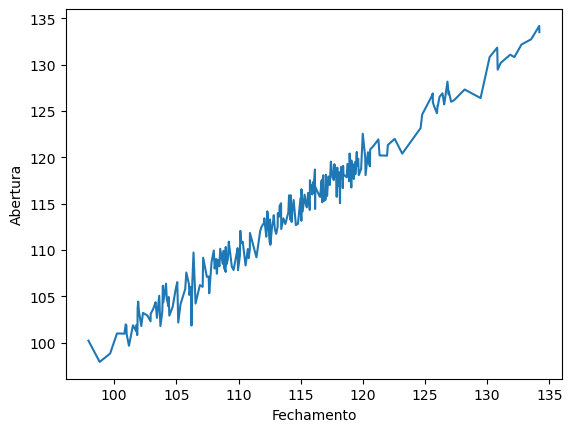

In [14]:
# Verificando a correlação dos dados
# Valores da Abertura e do Fechamento das ações
sns.lineplot(x='Fechamento', y = 'Abertura', data=dados_2023)

In [15]:
# Vamos verificar se existe sazonalidade entre dois meses no ano de 2023
# Vamos criar a coluna mes e ano para facilitar nosso filtro
dados['ano'] = dados['Data'].dt.year
dados['mes'] = dados['Data'].dt.month

# dados_2023['ano'] = dados_2023['Data'].dt.year
# dados_2023['mes'] = dados_2023['Data'].dt.month

In [16]:
# Veficando visualmente se existe alguma sazonalidade nos anos de 2022 e 2023

dados_2023 = dados.query('ano == 2023')
dados_2022 = dados.query('ano == 2022')

dados_mensais_2022 = dados_2022.groupby('mes')['Fechamento', 'Abertura'].mean()
dados_mensais_2023 = dados_2023.groupby('mes')['Fechamento','Abertura'].mean()


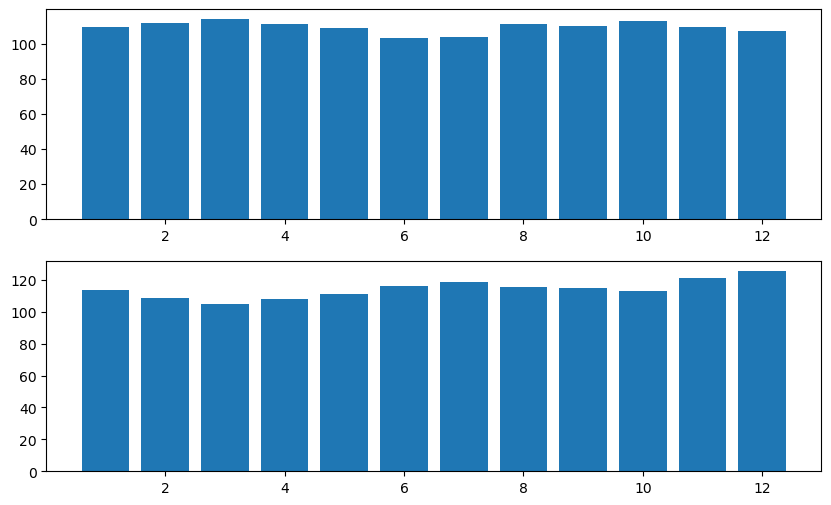

In [17]:
plt.figure(figsize=(10,6))
ax = plt.subplot(2,1,1)
plt.bar(np.linspace(1,12,12), dados_mensais_2022['Fechamento'])
ax = plt.subplot(2,1,2)
plt.bar(np.linspace(1,12,12), dados_mensais_2023['Fechamento'])
ax = ax

In [18]:
# função de autocorrelação
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

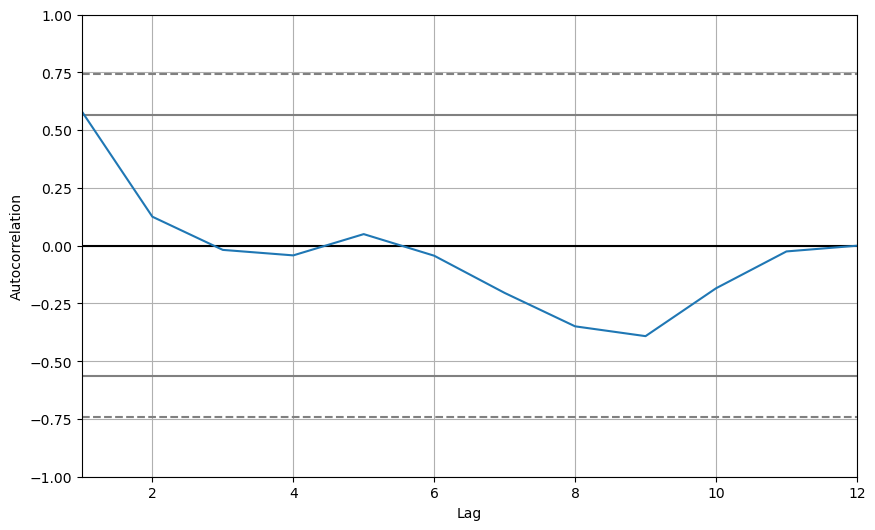

In [19]:
# Podemos perceber que não há uma autocorrelação forte na variável fechamento, o que podemos inferir que
# provavelmente não há sazonalidade também
plt.figure(figsize=(10,6))
autocorrelation_plot(dados_mensais_2023['Fechamento'])

# Criando o primeiro modelo com Prophet com parâmetros padrões

In [20]:
# Primeiras as primeiras previsões usando Prophet

from prophet import Prophet

In [21]:
# criando um novo dataframe para usar o prophet
df = pd.DataFrame()

In [22]:
# Prophet exige colunas com nomes específicos. A coluna de data = ds, e a coluna de previsão = y
df['ds'] = dados_2023['Data']
df['y'] = dados_2023['Fechamento']

In [23]:
# lembramos que a bolsa não opera em feriados e finais de semana, portanto temos um df de 2023 com 248 linhas
df.shape

(248, 2)

In [24]:
# Criando o modelo
modelo = Prophet()

In [25]:
# Treinando o modelo
modelo.fit(df)

20:50:20 - cmdstanpy - INFO - Chain [1] start processing
20:50:20 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Para efeito de testes, vamos fazer uma previsão para os próximos 30 dias
# Nesse momento, estamos criando um dataframe com as datas futuras
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [27]:
# esse dataframe possui os 248 dias de 2023 e também os próximos 30 dias da previsão 
dataframefuturo.shape

(278, 1)

In [28]:
dataframefuturo.tail(30)

,ds
248,2023-12-29
249,2023-12-30
250,2023-12-31
251,2024-01-01
252,2024-01-02
253,2024-01-03
254,2024-01-04
255,2024-01-05
256,2024-01-06
257,2024-01-07


In [29]:
# fazendo as previsões
previsao = modelo.predict(dataframefuturo)

In [30]:
# mostrando os dias futuros e os valores previstos
previsao[['ds','yhat_lower', 'yhat_upper', 'yhat']].tail(30)

# ds = data futura
# yhat_lower = intervalo de confiança para menos
# yhat_upper = intervalo de confiança para mais
# yhat = valor previsto

,ds,yhat_lower,yhat_upper,yhat
248,2023-12-29,119.858276,134.212123,127.254575
249,2023-12-30,118.450657,134.062584,126.280391
250,2023-12-31,118.680961,132.940706,125.848772
251,2024-01-01,119.851214,134.560869,126.997124
252,2024-01-02,119.788916,134.078337,127.046410
253,2024-01-03,120.852169,135.422147,128.283861
254,2024-01-04,120.337975,135.560749,127.838082
255,2024-01-05,121.084559,135.711190,128.237225
256,2024-01-06,120.241679,133.603935,127.263041
257,2024-01-07,119.398824,133.937477,126.831422


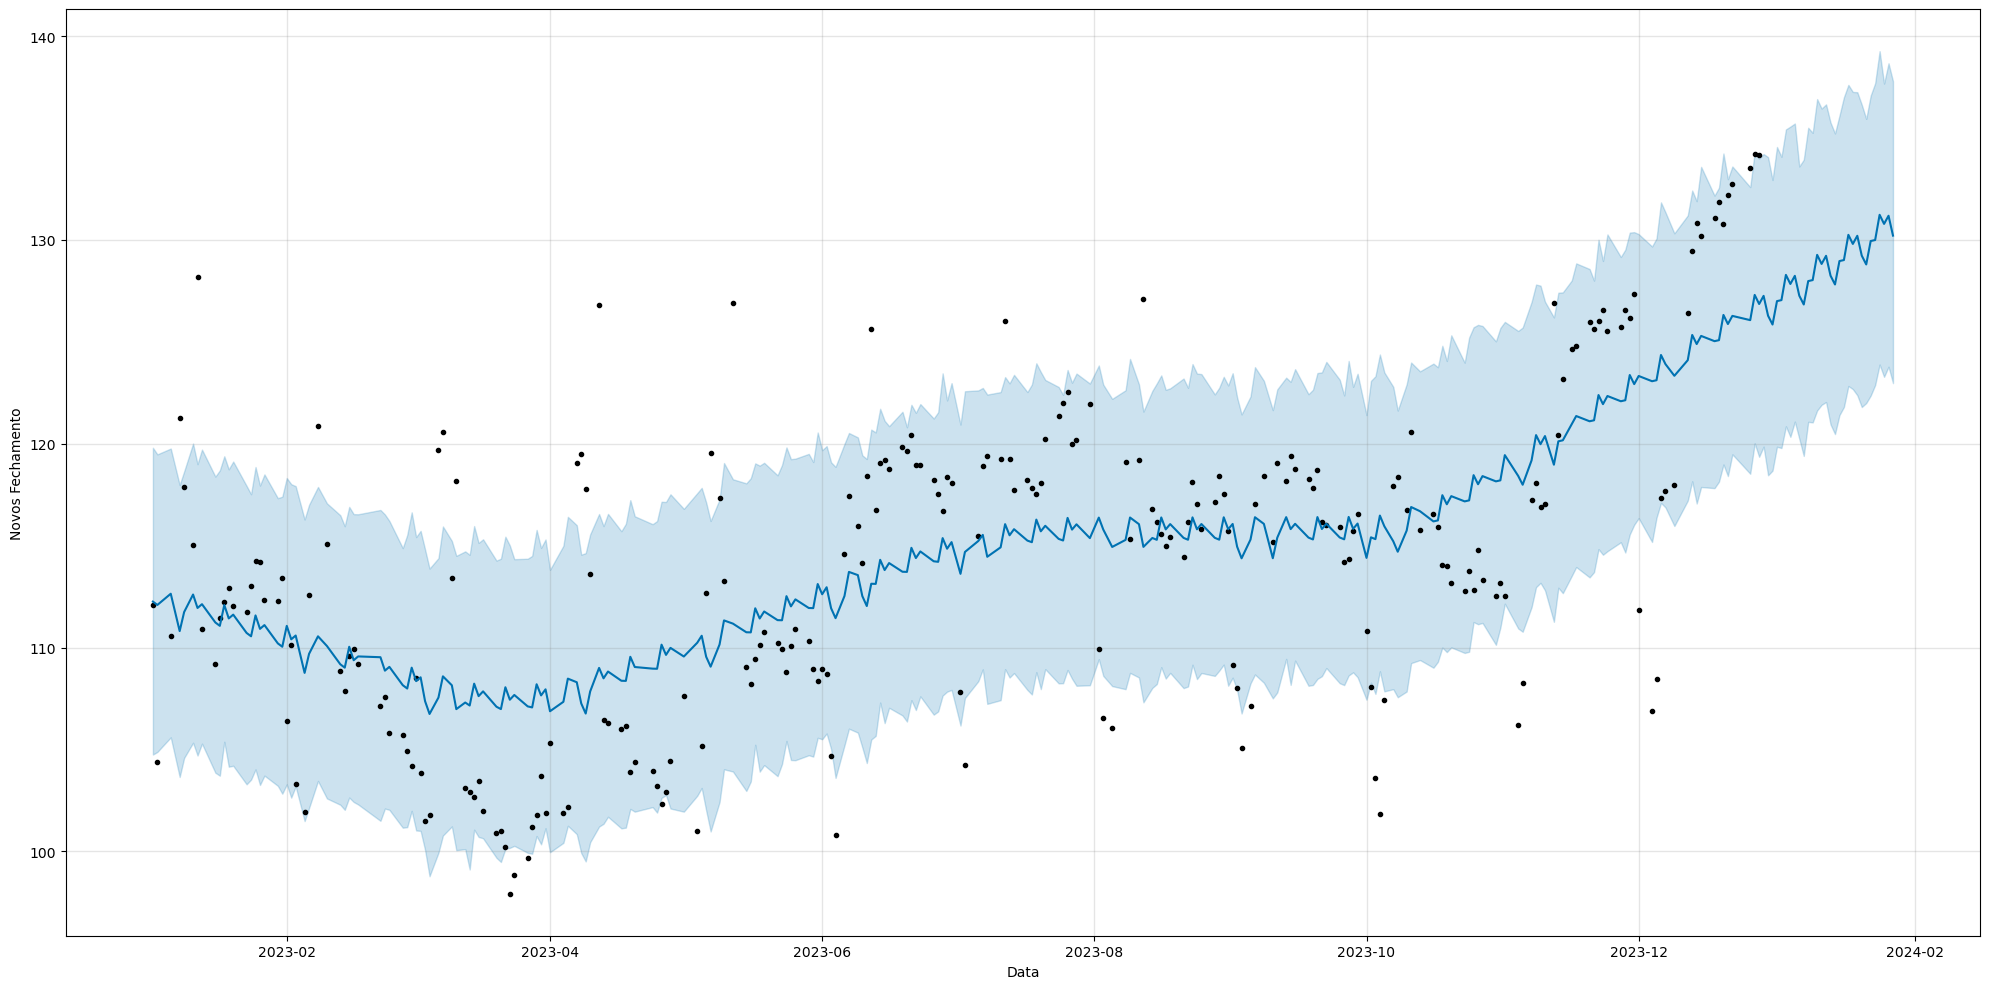

In [31]:
# plotando os valores
modelo.plot(previsao, xlabel='Data', ylabel='Novos Fechamento', figsize=(20,10));

# Pontos pretos => são os dados que já conhecemos
# Linha azul escura => o modelo está tentando ajustar os dados
# Intervalo de confiança => até onde nosso ajuste poderia estar (yhat_lower e yhat_upper)
# OBS: Pontos pretos fora do intervalo de confiança, são os outliers

# Criando o segundo modelo com dados de treino e teste

Vamos criar esse segundo modelo com dados de treino e teste para verificar onde os pontos de teste se encaixam no modelo após a previsão


In [32]:
# ordenando o dataframe por ordem de data
dados_2023 = dados_2023.sort_values('Data')
dados_2023.shape

(248, 10)

In [33]:
# Criando 2 dataframes. Um para armazenar os dados de treino e outro os dados de teste.
df_treino = pd.DataFrame()
df_teste = pd.DataFrame()

# Os dados de treino terão os primeiros 200 dias de 2023
df_treino['ds'] = dados_2023['Data'][:200]
df_treino['y'] = dados_2023['Fechamento'][:200]

# Os dados de teste terão os últimos 48 dias de 2023
df_teste['ds'] = dados_2023['Data'][200:]
df_teste['y'] = dados_2023['Fechamento'][200:]

In [34]:
df_treino.shape

(200, 2)

In [35]:
df_teste.shape

(48, 2)

In [36]:
# criando o modelo padrão, sem alteração dos hiperparâmetros
modelo = Prophet()

In [37]:
# treinando o modelo com os dados de treino
modelo.fit(df_treino)

20:50:20 - cmdstanpy - INFO - Chain [1] start processing
20:50:20 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# criando um dataframe com período futuro de 48 dias (qtde de dias do df de teste)
dataframefuturo = modelo.make_future_dataframe(periods=48)

In [39]:
# Prevendo os dados
previsao = modelo.predict(dataframefuturo)


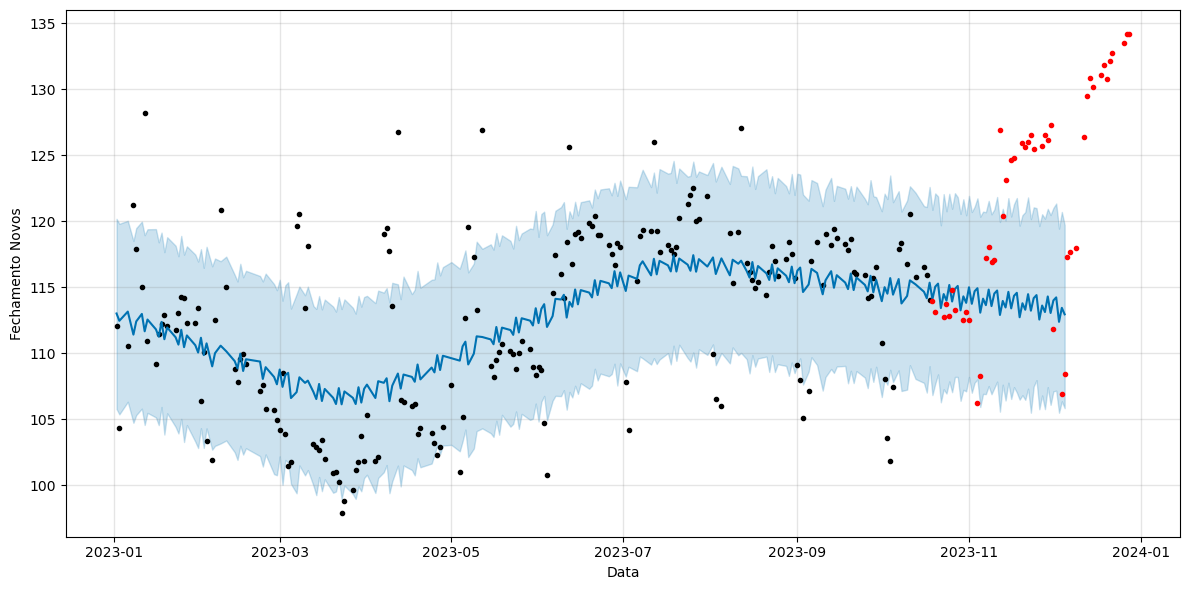

In [40]:
# Plotando os dados.
# Nesse gráfico, podemos observar o mesmo gráfico anterior, com a diferença que agora temos os pontos em 
# vermelho, que são os dados de treino. Podemos observar que nosso modelo não está prevendo de forma correta,
# pois os pontos vermelhos estão muito fora do intervalo de confiança, e muito afastados da previsão (linha azul)

# plotando os dados de treino 
modelo.plot(previsao, xlabel='Data', ylabel='Fechamento Novos', figsize=(12,6));

# plotando no mesmo gráfico, os dados de teste
plt.plot(df_teste['ds'], df_teste['y'], '.r')

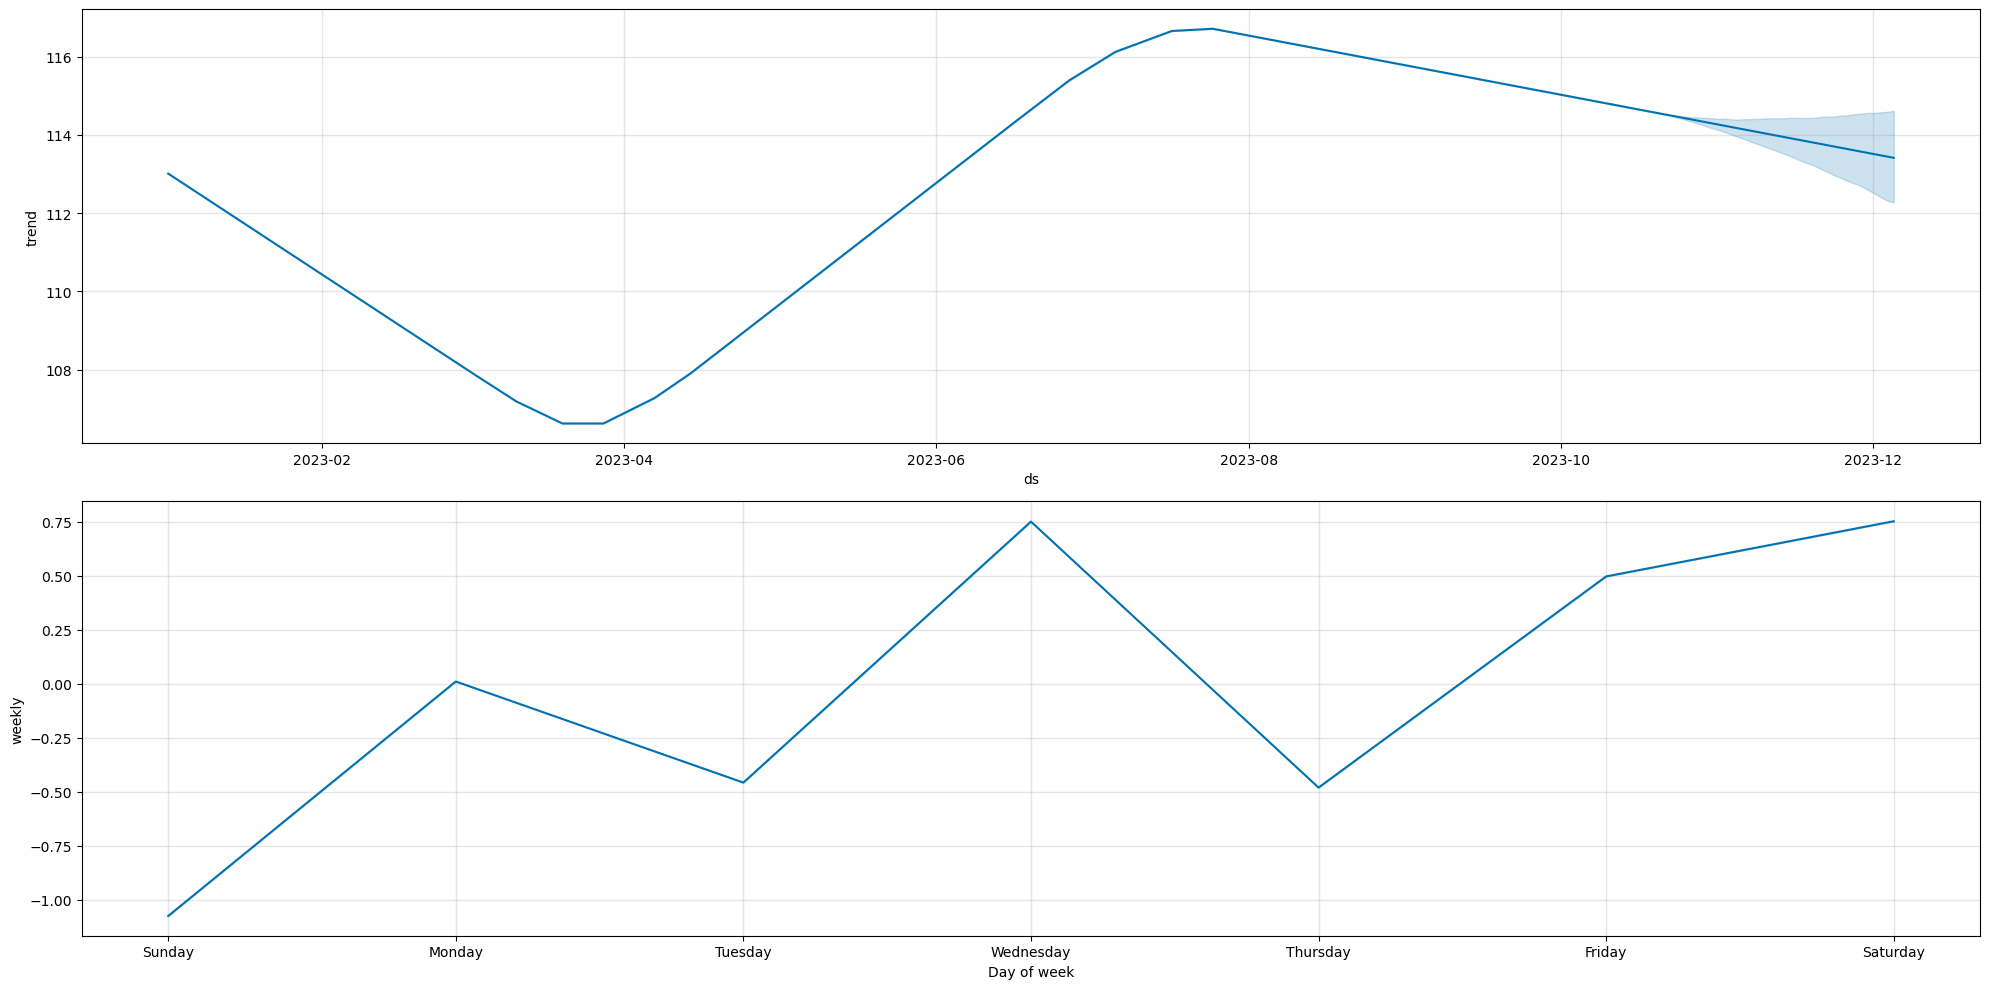

In [41]:
# decompondo os componentes do grafico em tendência e sazonalidade para um melhor entendimento
# No primeiro gráfico, temos uma tendência de alta e queda, mostrando que os valores das ações tem muita
# oscilação. O cone ao final do gráfico indica um intervalo de confiança da previsão.

# No segundo gráfico, o modelo indica uma pequena sazolanidade semanal, indicando um pico maior no fechamento
# da quarta-feira
modelo.plot_components(previsao, figsize=(20,10));

# Novo modelo analisando os changepoints (mudança de tendências)

In [42]:
# Por padrão, o prophet faz a análise de tendência (padrão de crescimento/decrescimento) do gráfico de forma 
# linear. Esse comportamento é muito importante para fazer as previsões, pois elas serão realizadas de acordo
# com um padrão do passado.


# Será que essa tendência do gráfico anterior está correta? Não poderíamos alterar alguns parâmetros para ajustar a
# tendência nos pontos? Podemos ajustar esse pontos de tendência um pouco mais para ajudar nosso modelo?

# Vamos agora ajustar os pontos de tendência para melhor ajustar o modelo
# Para isso, vamos usar a add_changepoints_to_plot.

# Pontos de tendência são pontos onde existe uma mudança de rumo na linha de tendência

from prophet.plot import add_changepoints_to_plot

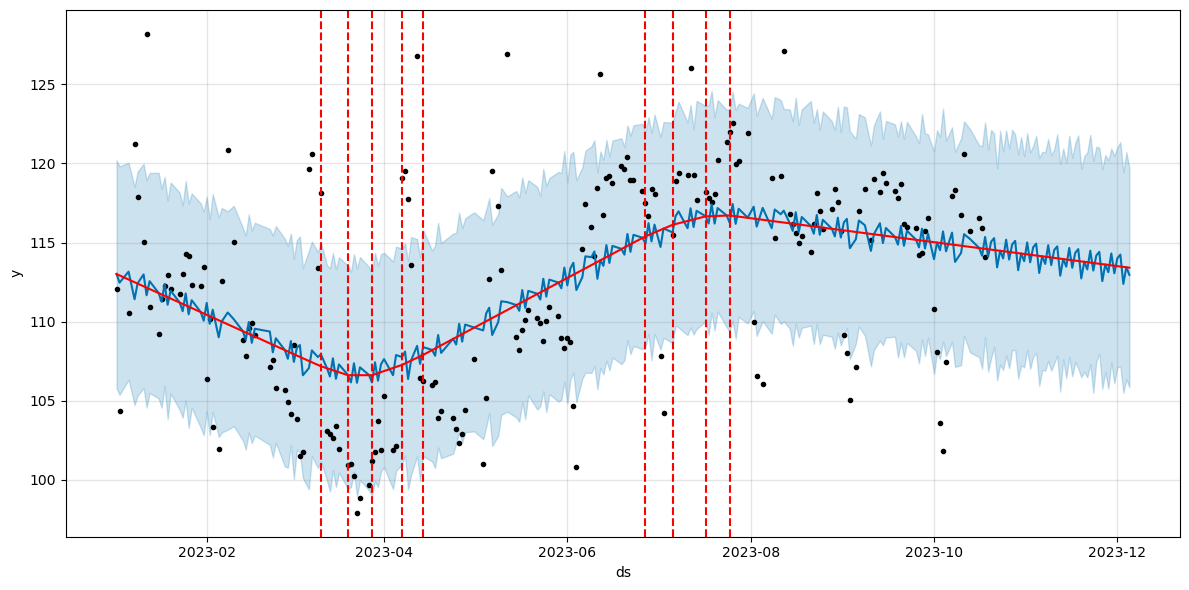

In [43]:
# Visualizando os change points => pontos de mudança de tendência

# Essa mudança de tendência é muito importante para o modelo. Pois ela é o comportamento que os dados tem
# em um determinado período, e não segnifica que no período completo a tendẽncia tenha o mesmo comportamento.
# No gráfico abaixo, estamos ajustando vários segmentos de reta para períodos de tempo na série temporal.
# Nesse primeiro momento, vamos deixar o prophet localizar esses pontos de mudanças de tendência

# Plotando o modelo
fig = modelo.plot(previsao, figsize=(12,6))

# Adicionando os pontos de mudança de tendência (linha vermelha vertical)
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

20:50:21 - cmdstanpy - INFO - Chain [1] start processing
20:50:21 - cmdstanpy - INFO - Chain [1] done processing


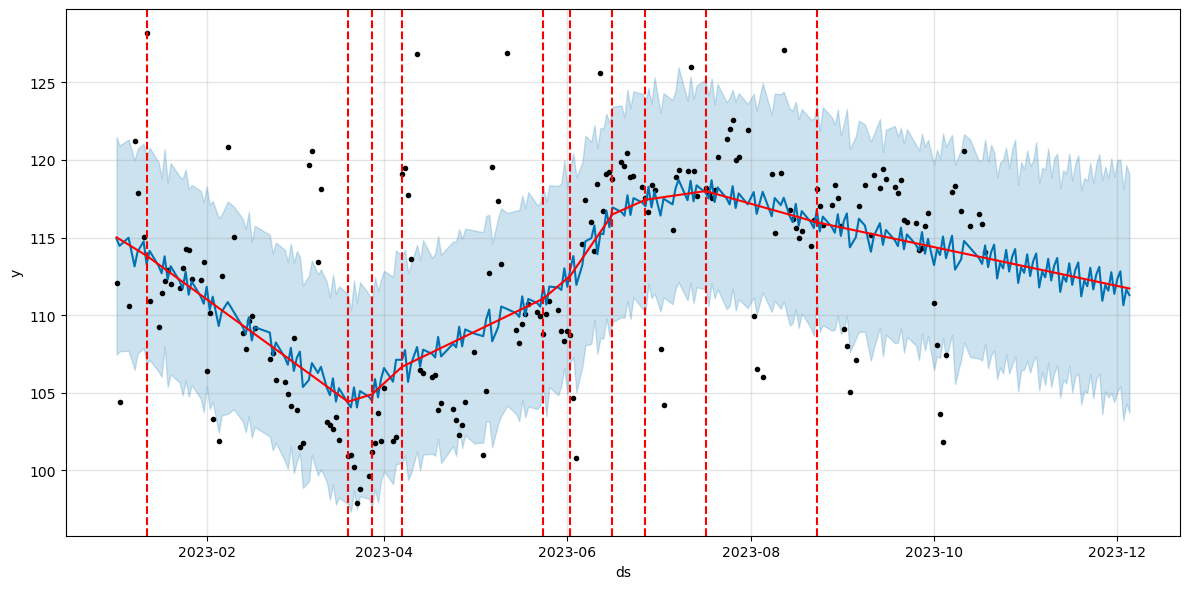

In [44]:
# Por padrão, o prophet configura o crescimento do gráfico com uma tendência linear. Mas como podemos observar no
# gráfico, ele apresenta um formato de "s" (siguimoide), que indica uma tendência logística, que envolve um 
# crescimento exponencial, seguido de uma redução constante, até uma estabilização, assumindo uma curva em 
# formato de "S"

# Podemos forçar o prophet a identificar um número maior de changepoints no decorrer da linha do gráfico. Isso
# ajudará o modelo nas previsões para identificar futuras mudança de tendências para os dados previstos.

# n_changepoints => altera o número de changepoints (quantidade de recortes na tendencia)
# changepoint_prior_scale => aumenta a área na série temporal onde ele pode enxergar changepoints. Padrao 0.05.
# changepoint_prior_scale é como se estivéssemos colocando uma lupa sobre o gráfico e identificando tendências
# mais sutis.

# Caso tenhamos datas que temos certeza de alteração de tendência, podemos inclui-la manualmente
# changepoints= ['01.01.2023'] => podemos adicionar changepoints específicos

# linha vermelha horizontal => tendencia da serie temporal
# linha vermelha vertical => changepoints
# Obs: Temos que alterar esses parâmetros com caulela, pois podemos criar um overfitting (ajustar demais os dados
# ao modelo, e dificultar a generalização)


# aumentando o n_changepoints para 25, e aumentando a "lupa" do gráfico para 1.0 (o padrão é de 0.05)
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=0.5)
modelo.fit(df_treino)
dataframefuturo = modelo.make_future_dataframe(periods=48)
previsao = modelo.predict(dataframefuturo)
fig = modelo.plot(previsao, figsize=(12,6))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)



# quando usamos a função diff() seria identificar possíveis changepoints

# Novo modelo ajustando os feriados, sazonalidade e finais de semana

Como a bolsa de valores não opera nos feriados nacionais nem aos finais de semana, temos que informar ao modelo quais são os dias que ele não deverá "processar" para fazer a previsão 

In [45]:
# Criando um novo modelo com os hiperparametros configurados anteriormente
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=1.0)


In [46]:
# Adicionando no modelo os feriados do Brasil
# Obs: caso tivéssemos paralização também nos feriados regionais, poderíamos criar um df com nome feriados
# e incluir no modelo da seguinte forma:
# modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10, hollidays=feriados)

modelo.add_country_holidays(country_name='BR')

In [47]:
modelo.fit(df_treino)

20:50:21 - cmdstanpy - INFO - Chain [1] start processing
20:50:21 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
dataframefuturo = modelo.make_future_dataframe(periods=48)


In [49]:
dataframefuturo.shape

(248, 1)

In [50]:
previsao = modelo.predict(dataframefuturo)

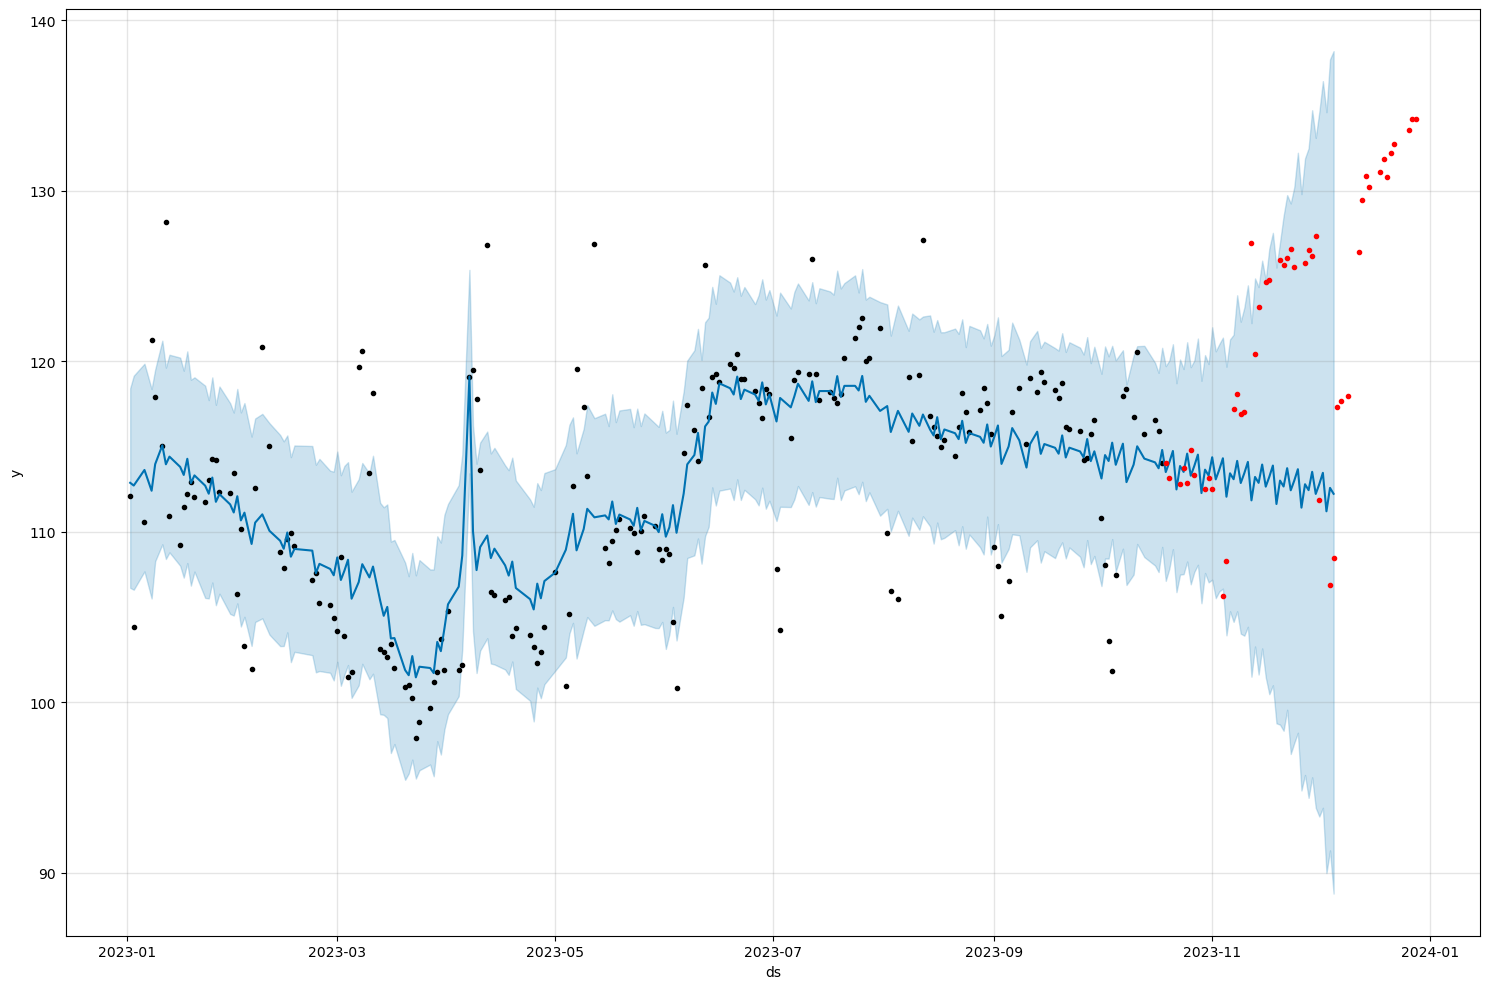

In [51]:
fig = modelo.plot(previsao, figsize=(15,10))
plt.plot(df_teste['ds'], df_teste['y'], '.r')

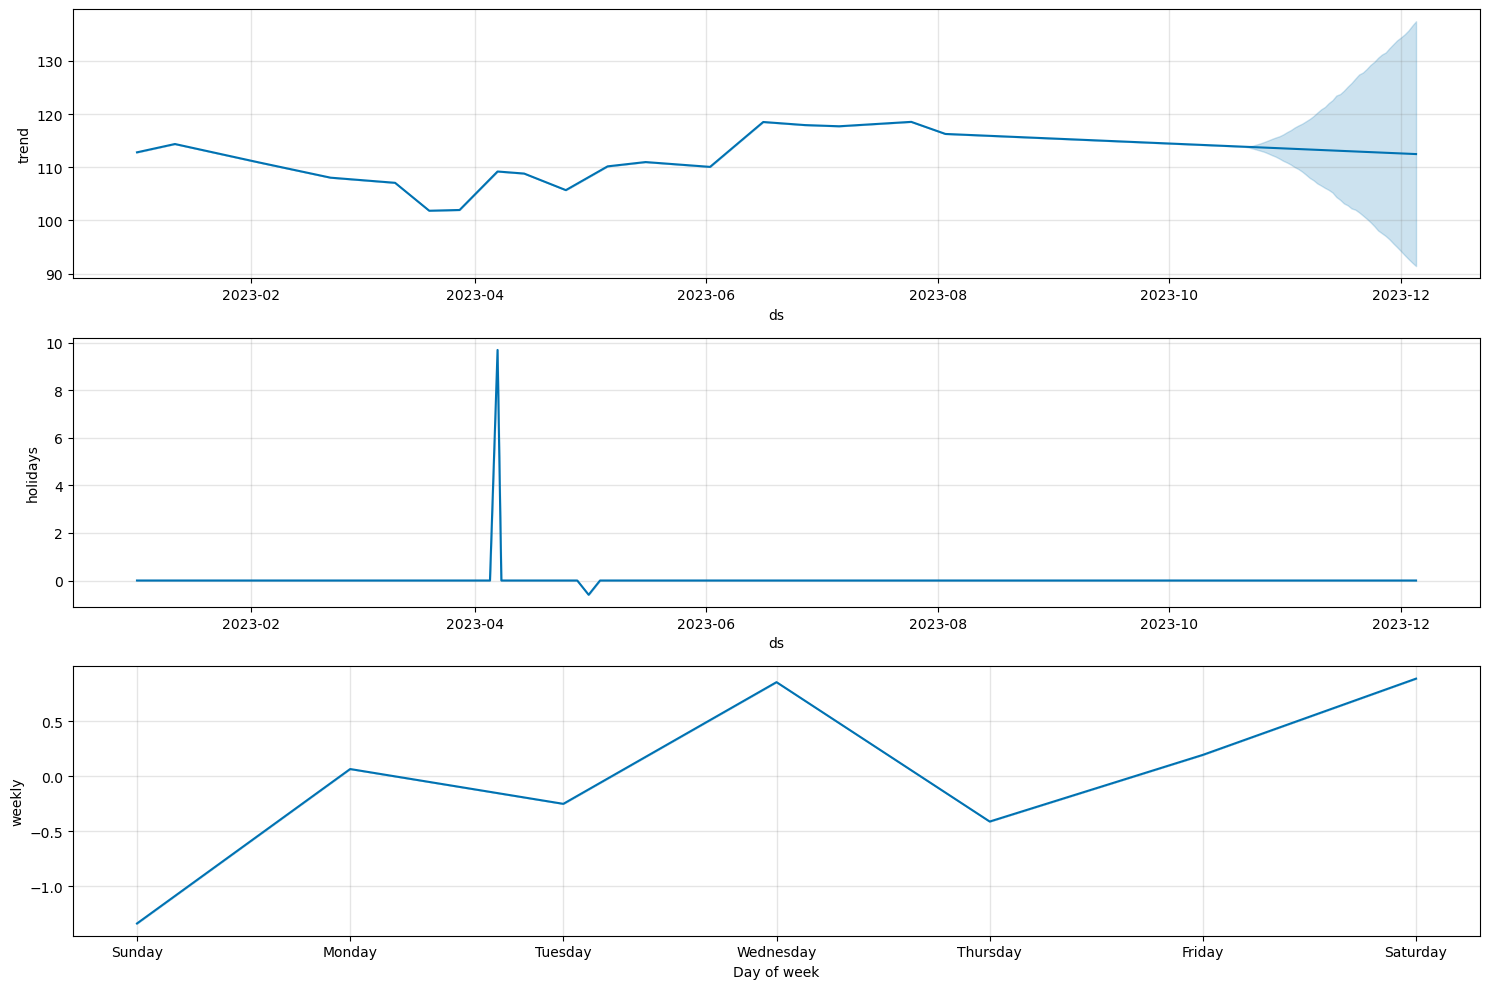

In [52]:
modelo.plot_components(previsao, figsize=(15,10));

In [53]:
# Idenficando o tipo de sazonalidade
# Por padrão o prophet coloca uma sazonalidade positiva (seasonality_mode=additive)
# Vamos testar agora com a sazonalidade multiplicativa

# Aditiva: É quando a série apresenta flutuações sazonais mais ou menos constantes,
# não importando o nível global da série.

# Multiplicativa: O tamanho das flutuações sazonais variam dependendo do nível global da série.

# criando um novo modelo com sazonalidade multiplicativa
modelo_multiplicativa = Prophet(n_changepoints=25,changepoint_prior_scale=1.0, seasonality_mode='multiplicative')
modelo_multiplicativa.add_country_holidays(country_name='BR')


In [54]:
modelo_multiplicativa.fit(df_treino)

20:50:22 - cmdstanpy - INFO - Chain [1] start processing
20:50:22 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
dataframefuturo = modelo_multiplicativa.make_future_dataframe(48)

In [56]:
previsao_multiplicativa = modelo_multiplicativa.predict(dataframefuturo)

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Podemos observar abaixo, que o RMSE é bem maior que o MAE, o que pode indicar que os outiliers podem
# estar interferindo nos resultados. 

# Em relação à diferença entre sazonalidade aditiva e multiplicativa é mínima, não inteferindo na escolha
# de um ou outro

In [58]:
# Calculando a taxa de erro entre aditiva e multiplicativa com MAE

# Podemos medir a sazonalidade aditiva
print('Aditiva', mean_absolute_error(df_treino['y'], previsao['yhat'][:200]))

# Podemos medir a sazonalidade multiplicativa
print('Multiplicativa', mean_absolute_error(df_treino['y'], previsao_multiplicativa['yhat'][:200]))

Aditiva 3.2848895857380738
Multiplicativa 3.2567364357820163


In [59]:
# Calculando a taxa de erro entre aditiva e multiplicativa com RMSE e MAE

# Podemos medir a sazonalidade aditiva
print('Aditiva', mean_squared_error(df_treino['y'], previsao['yhat'][:200]))

# Podemos medir a sazonalidade multiplicativa
print('Multiplicativa', mean_squared_error(df_treino['y'], previsao_multiplicativa['yhat'][:200]))

Aditiva 22.40886012947302
Multiplicativa 22.09626519652779


# Tratando outliers (dados fora do intervalo de confiança)

In [60]:
# criando um novo dataframe para se retirar os outliers.
# No nosso caso, vamos definir outiliers como os dados fora do intervalo de confiança. Pode ter ocorrido
# um evento qualquer em determinados dias que fez os valores das ações subirem ou descerem abruptamente.
# Como é um evento esporárido, podemos excluí-los para não prejudicar nosso modelo

# vamos criar um novo dataframe para podermos manipular os outiliers
novo_y = df_treino
novo_y = novo_y.reset_index()

In [61]:
# retirando os valores que estão fora do intervalo de confiança

filtro = novo_y[(novo_y['y'] > previsao['yhat_lower'][:200]) & (novo_y['y'] < previsao['yhat_upper'][:200])] 
sem_outiliers = filtro

In [62]:
sem_outiliers.reset_index(inplace=True)

In [63]:
df_treino.head()

,ds,y
225,2023-01-02,112.074
207,2023-01-03,104.385
144,2023-01-06,110.565
102,2023-01-08,121.248
79,2023-01-09,117.893


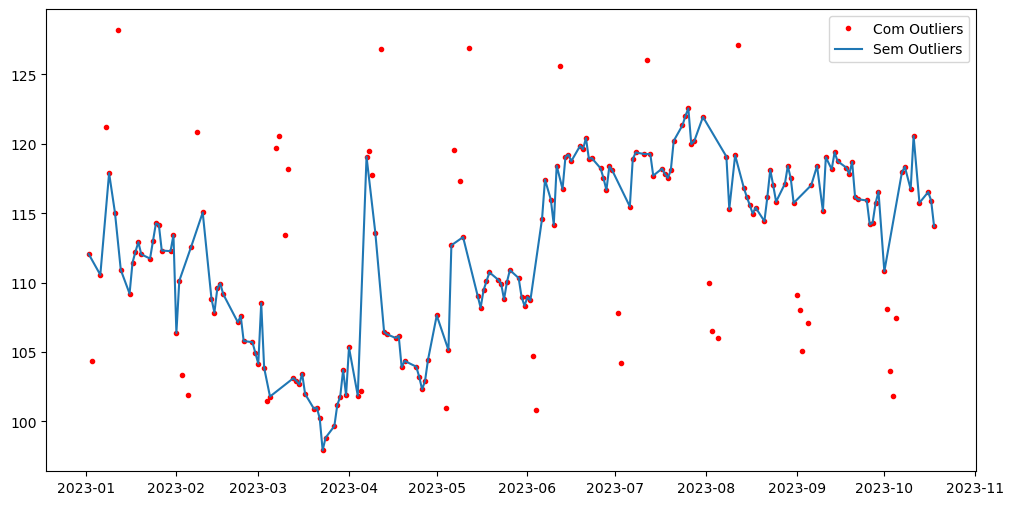

In [64]:
# plotando comparativo entre os dados sem outliers e com outliers

plt.figure(figsize=(12,6))
plt.plot(df_treino['ds'], df_treino['y'], 'r.')
plt.plot(sem_outiliers['ds'], sem_outiliers['y'])
plt.legend(labels=['Com Outliers', 'Sem Outliers'])

In [65]:
# Criando um novo dataframe para fazermos as previsões com prophet

df_sem_outliers = sem_outiliers[['ds', 'y']] 

In [66]:
# Criando, treinando e prevendo o novo modelo

modelo = Prophet(n_changepoints=25,changepoint_prior_scale=1.0)
modelo.add_country_holidays(country_name='BR')
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

20:50:22 - cmdstanpy - INFO - Chain [1] start processing
20:50:23 - cmdstanpy - INFO - Chain [1] done processing


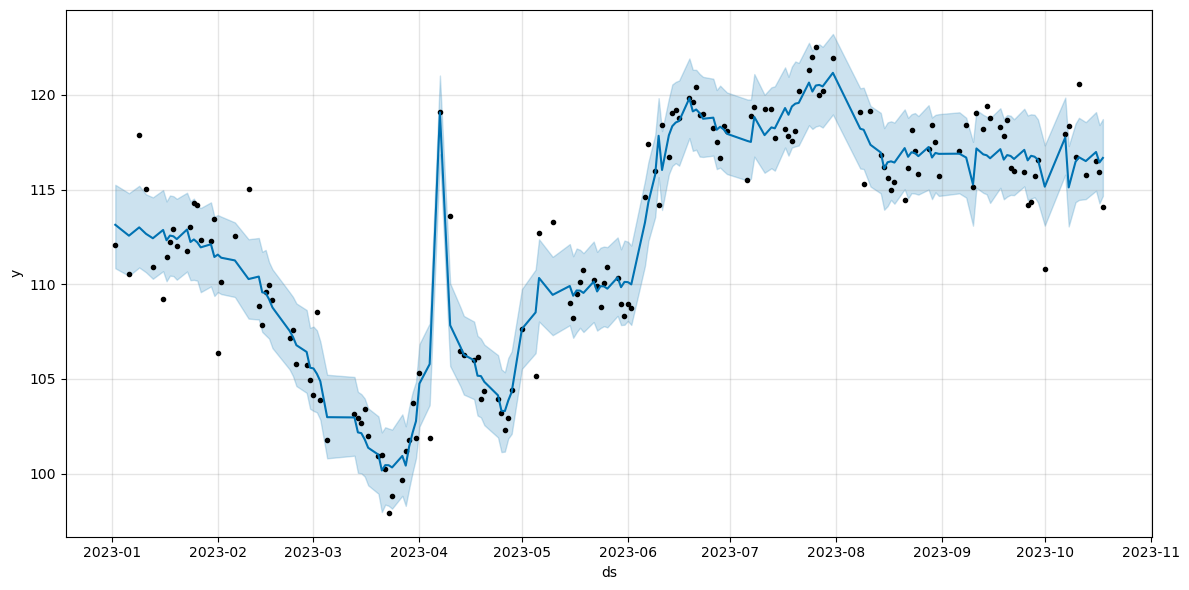

In [67]:
# plotando o modelo com o novo dataframe sem outliers
modelo.plot(previsao, figsize=(12,6));

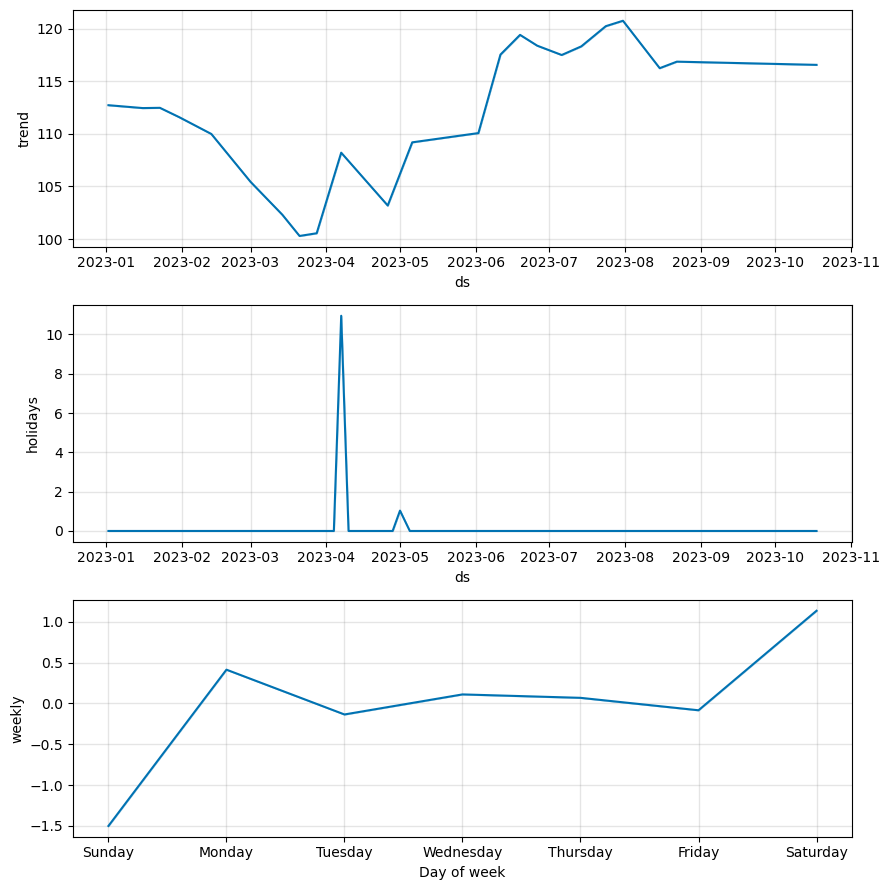

In [68]:
modelo.plot_components(previsao);

In [69]:
# Calculando a taxa de erro entre aditiva e multiplicativa com RMSE e MAE com dados sem outliers
# Observamos que a taxa de erro foi bem menor após retirarmos os valores extremos.
print('MAE', mean_squared_error(df_sem_outliers['y'], previsao['yhat'][:200]))
print('RMSE', mean_absolute_error(df_sem_outliers['y'], previsao['yhat'][:200]))


MAE 2.7470226766755843
RMSE 1.2149261915763592


# Métricas de validação

In [70]:
# Desenvolver as métricas